# Loading Data

In [255]:
import numpy as np
import pandas as pd

import sklearn
from sklearn import datasets 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [256]:
print(datasets.load_iris()["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [257]:
X, y = datasets.load_iris(return_X_y = True, as_frame = True)

In [258]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [259]:
#describe features
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [260]:
#Check data types of features
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [261]:
#values target can take
y.value_counts() #equally balanced

target
0    50
1    50
2    50
Name: count, dtype: int64

In [262]:
X.groupby(y).mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


# Binary Classification

## Visualization

In [263]:
#two classes for binary classification
X = X[y>0]
y = y[y>0]- 1

In [264]:
#collect all vars
all_vars = pd.concat([X,y], axis=1)

In [265]:
all_vars.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [266]:
all_vars.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,0.553855,0.828479,0.593709,0.494305
sepal width (cm),0.553855,1.000000,0.519802,0.566203,0.308080
petal length (cm),0.828479,0.519802,1.000000,0.823348,0.786424
petal width (cm),0.593709,0.566203,0.823348,1.000000,0.828129
target,0.494305,0.308080,0.786424,0.828129,1.000000


petal width is most correlated with the target value

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

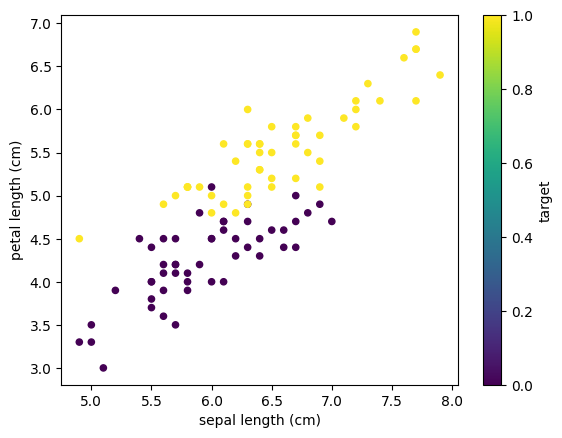

In [267]:
all_vars.plot.scatter(x="sepal length (cm)", y="petal length (cm)", c="target", colormap = "viridis")

very high values of sepal length, and high values of petal length, correspond to class 1

In [268]:
#Divide into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [269]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
78,6.0,2.9,4.5,1.5
143,6.8,3.2,5.9,2.3
55,5.7,2.8,4.5,1.3
116,6.5,3.0,5.5,1.8
115,6.4,3.2,5.3,2.3
...,...,...,...,...
110,6.5,3.2,5.1,2.0
121,5.6,2.8,4.9,2.0
64,5.6,2.9,3.6,1.3
142,5.8,2.7,5.1,1.9


In [270]:
X_test.shape

(33, 4)

## Logistic Regression

In [271]:
from sklearn.linear_model import LogisticRegression

In [272]:
logreg = LogisticRegression()

In [273]:
logreg.fit(X_train, y_train)

LogisticRegression()

In [274]:
#predict single instance
new_flower = pd.DataFrame(
    {"sepal length (cm)": [6.5], 
     "sepal width (cm)": [2.8], 
     "petal length (cm)": [7.1], 
     "petal width (cm)": [8.9],
    }
)

logreg.predict(new_flower)

array([1])

In [275]:
logreg.predict_proba(new_flower)

array([[9.92250726e-10, 9.99999999e-01]])

predictors (use .predict() ) and transformers (use .transform() ) are both estimators (use .fit() )

In [276]:
preds = logreg.predict(X_test)

In [277]:
#accuracy (manual)
(preds==y_test).sum()/len(preds)

0.9393939393939394

In [278]:
#metrics
preds = logreg.predict(X_train)
print("Train")
print(f"accuracy: {accuracy_score(y_train, preds)}")
print(f"f1 score: {f1_score(y_train, preds, average=None)}")
preds = logreg.predict(X_test)
print("Test")
print(f"accuracy: {accuracy_score(y_test, preds)}")
print(f"f1 score: {f1_score(y_test, preds, average=None)}")

Train
accuracy: 0.9701492537313433
f1 score: [0.96774194 0.97222222]
Test
accuracy: 0.9393939393939394
f1 score: [0.94736842 0.92857143]


## Using StandardScaler

In [279]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
steps =[
    ["scaler", StandardScaler()],
    ["model", LogisticRegression()],
]
pipeline = Pipeline(steps)

In [280]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ['model', LogisticRegression()]])

In [281]:
preds = pipeline.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, preds)}")
print(f"f1 score: {f1_score(y_test, preds)}")

accuracy: 0.9090909090909091
f1 score: 0.896551724137931


Note: 
pipeline.fit calls fit_transform on transformers and fit on predictor
pipeline.predict calls transform on transformer and predict on predictor

never use fit_transform on the test data, this prevents data leakage.

## Grid Search for Hyperparameter Tuning

In [295]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [296]:
X, y = datasets.load_iris(return_X_y = True, as_frame = True)
#two classes for binary classification
X = X[y>0]
y = y[y>0]- 1

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [298]:
params = {'solver': ["lbfgs", "liblinear"],
        'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],}

grid_search = GridSearchCV(LogisticRegression(), param_grid=params, cv=5)

In [299]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
                         'solver': ['lbfgs', 'liblinear']})

In [300]:
grid_search.best_params_

{'C': 0.5, 'solver': 'lbfgs'}

In [301]:
#metrics
preds = grid_search.predict(X_train)
print("Train")
print(f"accuracy: {accuracy_score(y_train, preds)}")
print(f"f1 score: {f1_score(y_train, preds, average=None)}")

preds = grid_search.predict(X_test)
print("Test")
print(f"accuracy: {accuracy_score(y_test, preds)}")
print(f"f1 score: {f1_score(y_test, preds, average=None)}")

Train
accuracy: 0.9701492537313433
f1 score: [0.96774194 0.97222222]
Test
accuracy: 0.9393939393939394
f1 score: [0.94736842 0.92857143]


# Multiclass classification

## Visualizations

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X, y = datasets.load_iris(return_X_y = True, as_frame = True)

In [115]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

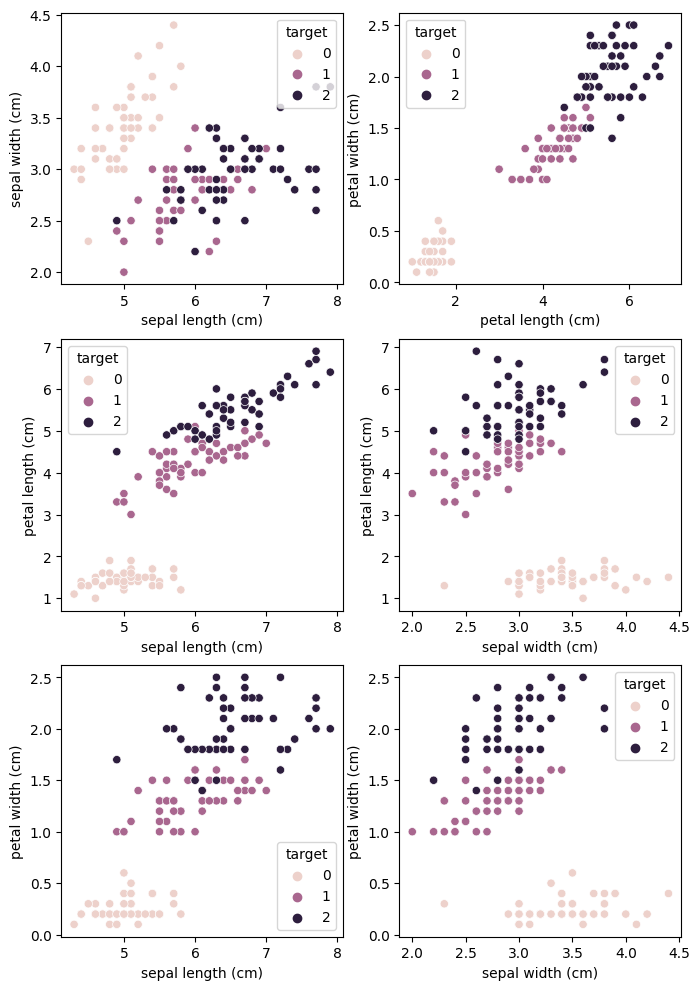

In [150]:
fig, ax = plt.subplots(3, 2, figsize=(8, 12))
sns.scatterplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = X, hue = y, ax=ax[0][0])
sns.scatterplot(x = 'sepal length (cm)', y = 'petal length (cm)', data = X, hue = y, ax=ax[1][0])
sns.scatterplot(x = 'sepal length (cm)', y = 'petal width (cm)', data = X, hue = y, ax=ax[2][0])

sns.scatterplot(x = 'petal length (cm)', y = 'petal width (cm)', data = X, hue = y, ax=ax[0][1])
sns.scatterplot(x = 'sepal width (cm)', y = 'petal length (cm)', data = X, hue = y, ax=ax[1][1])
sns.scatterplot(x = 'sepal width (cm)', y = 'petal width (cm)', data = X, hue = y, ax=ax[2][1])

plt.show()

In [152]:
pd.concat([X,y], axis=1).isin([np.inf, -np.inf]).sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

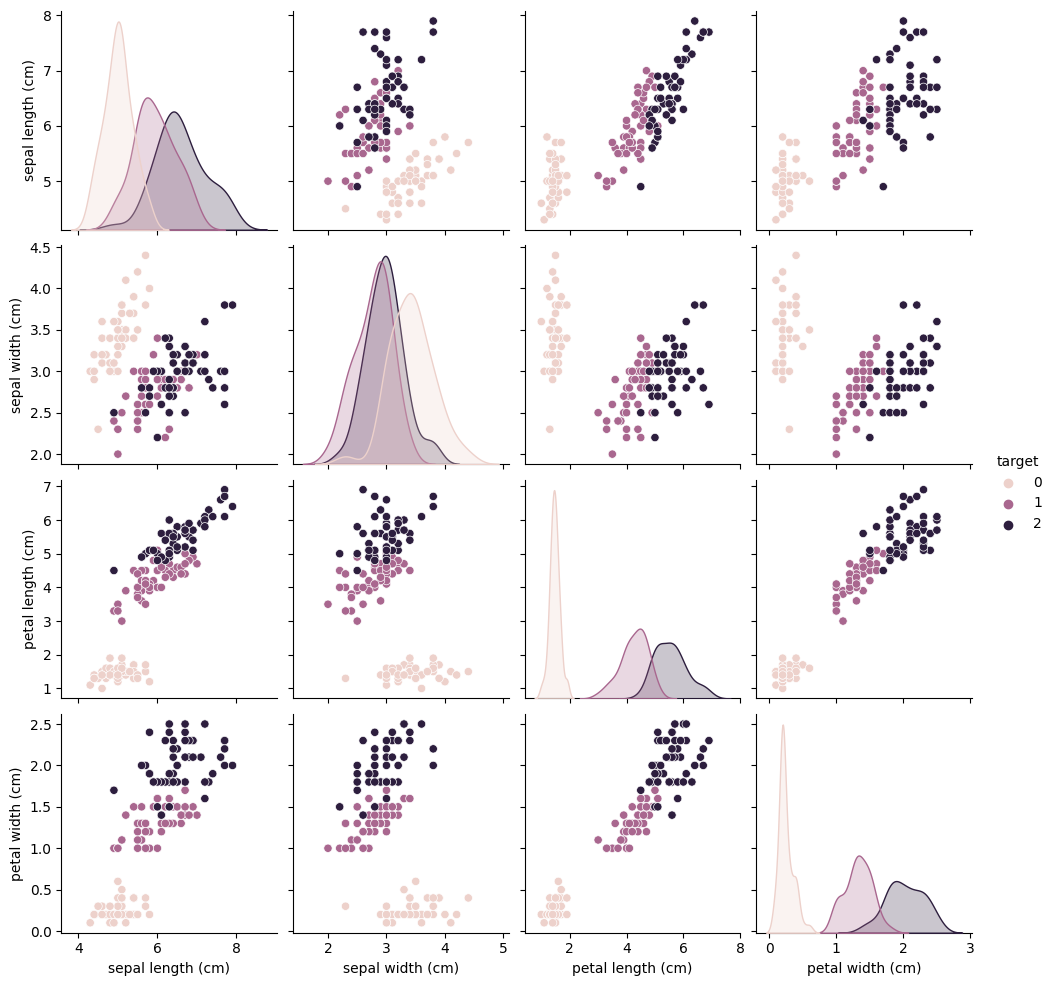

In [153]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
sns.pairplot(pd.concat([X,y], axis=1), hue = 'target')
plt.show()

petal length seems to have the clearest distinction between the three classes in the density plots

## Logistic Regresion

In [109]:
X, y = datasets.load_iris(return_X_y = True, as_frame = True)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [111]:
logreg = LogisticRegression(max_iter=200)

In [112]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [113]:
preds = logreg.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, preds)}")
print(f"f1 score: {f1_score(y_test, preds, average=None)}")

accuracy: 1.0
f1 score: [1. 1. 1.]


## Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier

In [203]:
X, y = datasets.load_iris(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [204]:
dtc = DecisionTreeClassifier(random_state=42)

In [205]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [206]:
preds = dtc.predict(X_train)
print("Train")
print(f"accuracy: {accuracy_score(y_train, preds)}")
print(f"f1 score: {f1_score(y_train, preds, average=None)}")
preds = dtc.predict(X_test)
print("Test")
print(f"accuracy: {accuracy_score(y_test, preds)}")
print(f"f1 score: {f1_score(y_test, preds, average=None)}")

Train
accuracy: 1.0
f1 score: [1. 1. 1.]
Test
accuracy: 0.98
f1 score: [1.         0.96774194 0.96774194]


We will use grid search for hyperparameter tuning

In [207]:
params = {'max_depth' : [2,3,4,5],
        'min_samples_split': [2,3,4,5],
        'min_samples_leaf': [1,2,3,4,5]}
grid_search = GridSearchCV(dt, param_grid=params, cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5]})

In [208]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [209]:
preds = grid_search.predict(X_train)
print("Train")
print(f"accuracy: {accuracy_score(y_train, preds)}")
print(f"f1 score: {f1_score(y_train, preds, average=None)}")
preds = grid_search.predict(X_test)
print("Test")
print(f"accuracy: {accuracy_score(y_test, preds)}")
print(f"f1 score: {f1_score(y_test, preds, average=None)}")

Train
accuracy: 0.97
f1 score: [1.         0.95774648 0.95522388]
Test
accuracy: 0.98
f1 score: [1.         0.96774194 0.96774194]


In [211]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



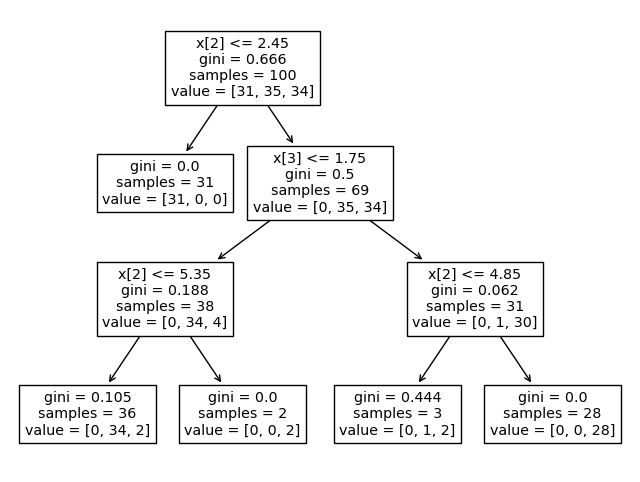

In [230]:
#visualizing the decision tree
plt.figure(figsize=(8, 6))
sklearn.tree.plot_tree(grid_search.best_estimator_)
plt.show()

Describe the decision tree in words using code from sklearn docs: 

https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#tree-structure

In [219]:
clf = grid_search.best_estimator_
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value

node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, 0)]  # start with the root node id (0) and its depth (0)
while len(stack) > 0:
    # `pop` ensures each node is only visited once
    node_id, depth = stack.pop()
    node_depth[node_id] = depth

    # If the left and right child of a node is not the same we have a split
    # node
    is_split_node = children_left[node_id] != children_right[node_id]
    # If a split node, append left and right children and depth to `stack`
    # so we can loop through them
    if is_split_node:
        stack.append((children_left[node_id], depth + 1))
        stack.append((children_right[node_id], depth + 1))
    else:
        is_leaves[node_id] = True

print(
    "The binary tree structure has {n} nodes and has "
    "the following tree structure:\n".format(n=n_nodes)
)
for i in range(n_nodes):
    if is_leaves[i]:
        print(
            "{space}node={node} is a leaf node with value={value}.".format(
                space=node_depth[i] * "\t", node=i, value=np.around(values[i], 3)
            )
        )
    else:
        print(
            "{space}node={node} is a split node with value={value}: "
            "go to node {left} if X[:, {feature}] <= {threshold} "
            "else to node {right}.".format(
                space=node_depth[i] * "\t",
                node=i,
                left=children_left[i],
                feature=feature[i],
                threshold=threshold[i],
                right=children_right[i],
                value=np.around(values[i], 3),
            )
        )

The binary tree structure has 9 nodes and has the following tree structure:

node=0 is a split node with value=[[31. 35. 34.]]: go to node 1 if X[:, 2] <= 2.449999988079071 else to node 2.
	node=1 is a leaf node with value=[[31.  0.  0.]].
	node=2 is a split node with value=[[ 0. 35. 34.]]: go to node 3 if X[:, 3] <= 1.75 else to node 6.
		node=3 is a split node with value=[[ 0. 34.  4.]]: go to node 4 if X[:, 2] <= 5.349999904632568 else to node 5.
			node=4 is a leaf node with value=[[ 0. 34.  2.]].
			node=5 is a leaf node with value=[[0. 0. 2.]].
		node=6 is a split node with value=[[ 0.  1. 30.]]: go to node 7 if X[:, 2] <= 4.8500001430511475 else to node 8.
			node=7 is a leaf node with value=[[0. 1. 2.]].
			node=8 is a leaf node with value=[[ 0.  0. 28.]].


## Support Vector Machine (SVM)

In [238]:
from sklearn.svm import SVC

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [239]:
X, y = datasets.load_iris(return_X_y = True, as_frame = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [240]:
svc = SVC()

In [241]:
svc.fit(X_train, y_train)

SVC()

In [242]:
train_pred = svc.predict(X_train)
test_pred = svc.predict(X_test)

In [243]:
print("Train")
print(f"accuracy: {accuracy_score(y_train, train_pred)}")
print(f"f1 score: {f1_score(y_train, train_pred, average=None)}")
print("Test")
print(f"accuracy: {accuracy_score(y_test, test_pred)}")
print(f"f1 score: {f1_score(y_test, test_pred, average=None)}")

Train
accuracy: 0.97
f1 score: [1.         0.94915254 0.96      ]
Test
accuracy: 0.98
f1 score: [1.         0.97297297 0.96551724]


In [244]:
params = {'kernel' : ["linear", "rbf", "poly"],
        'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],}
grid_search = GridSearchCV(SVC(), param_grid=params, cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
                         'kernel': ['linear', 'rbf', 'poly']})

In [246]:
grid_search.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [247]:
train_pred = grid_search.predict(X_train)
test_pred = grid_search.predict(X_test)

In [248]:
print("Train")
print(f"accuracy: {accuracy_score(y_train, train_pred)}")
print(f"f1 score: {f1_score(y_train, train_pred, average=None)}")
print("Test")
print(f"accuracy: {accuracy_score(y_test, test_pred)}")
print(f"f1 score: {f1_score(y_test, test_pred, average=None)}")

Train
accuracy: 0.98
f1 score: [1.         0.96666667 0.97297297]
Test
accuracy: 0.98
f1 score: [1.         0.97297297 0.96551724]


## Visualizing SVM

We will use only two features (in this case, sepal length and petal length) so the model can be easily visualized

In [302]:
from sklearn.svm import SVC

In [310]:
X, y = datasets.load_iris(return_X_y = True, as_frame = True)
X = X.loc[:, ["sepal length (cm)", "petal length (cm)"]]

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [312]:
params = {'kernel' : ["linear", "rbf", "poly"],
        'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],}
grid_search = GridSearchCV(SVC(), param_grid=params, cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0],
                         'kernel': ['linear', 'rbf', 'poly']})

In [313]:
grid_search.best_params_

{'C': 0.25, 'kernel': 'poly'}

In [314]:
train_pred = grid_search.predict(X_train)
test_pred = grid_search.predict(X_test)

In [315]:
print("Train")
print(f"accuracy: {accuracy_score(y_train, train_pred)}")
print(f"f1 score: {f1_score(y_train, train_pred, average=None)}")
print("Test")
print(f"accuracy: {accuracy_score(y_test, test_pred)}")
print(f"f1 score: {f1_score(y_test, test_pred, average=None)}")

Train
accuracy: 0.96
f1 score: [1.         0.94444444 0.93939394]
Test
accuracy: 0.98
f1 score: [1.         0.96774194 0.96774194]


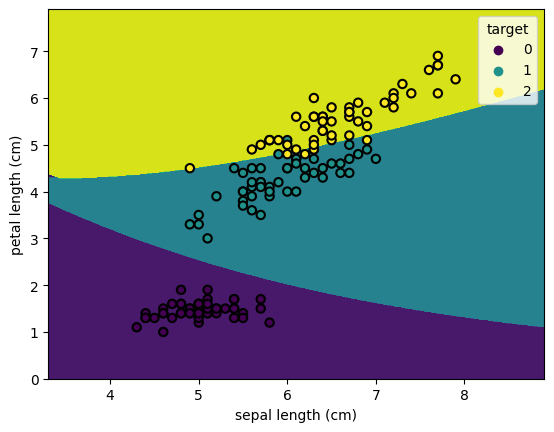

In [349]:
DecisionBoundaryDisplay.from_estimator(
    grid_search.best_estimator_, 
    X, 
    grid_resolution=600, 
    cmap="viridis", 
    response_method="predict"
)
sns.scatterplot(
    x = 'sepal length (cm)', 
    y = 'petal length (cm)', 
    data = X, 
    hue = y, 
    palette="viridis", 
    edgecolor='k', 
    linewidth=1.5)
plt.show()